# Final Project Phase 2 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 2 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase I below. You may include additional cleaning functions if you have extra datasets. 


## Downloaded Dataset Requirement



In [ ]:
import csv
def data_parser(question):
  with open("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv", "r") as dat:
    reader = csv.reader(dat)
    header = next(reader)
    header[0] = "Year"
    dataList = [line for line in reader if line[7] == question]
  final_list = []
  final_list.append(header)
  for line in dataList:
    if line[11] != "":
      if int(line[16]) > 100 and line[32] != "INCNR":
        final_list.append(line)
  deleted_indicies = [29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 13, 12, 11, 9, 8, 6, 5, 4, 1]
  for i in deleted_indicies:
    for j in final_list:
      del j[i]
  with open(question + ".csv", "w", newline = "") as writ:
    writer = csv.writer(writ)
    for line in final_list:
      writer.writerow(line)





############ Function Call ############
data_parser("Percent of adults who engage in no leisure-time physical activity")
data_parser("Percent of adults aged 18 years and older who have obesity")

FileNotFoundError: ignored

## Web Collection Requirement \#1


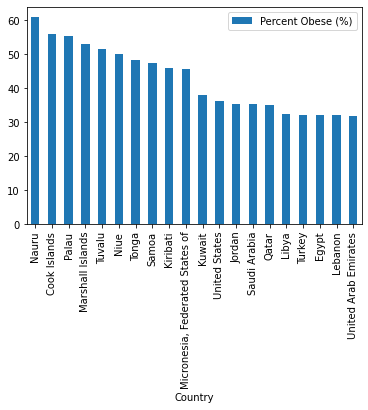

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
def web_parser1():
	webpage = "https://www.cia.gov/library/publications/the-world-factbook/rankorder/2228rank.html"
	url = requests.get(webpage)
	soupy = BeautifulSoup(url.content,features="lxml")
	table = soupy.find('table',id ="rankOrder")
	rows = table.find_all('tr')
	header = table.find_all('th')
	cleaned = [[i.text for i in header]]
	for tr in rows[1:]:
		td = tr.find_all('td')
		row = [i.text for i in td]
		cleaned.append(row)
	data = pd.DataFrame(cleaned[1:])
	cleaned[0][2] = "Percent Obese (%)"
	data.columns = cleaned[0]
	data = data.set_index("Rank")
	data.to_csv("CIA-Data.csv", sep='\t', encoding='utf-8')
	data["Percent Obese (%)"] = pd.to_numeric(data["Percent Obese (%)"], downcast="float")
	data.head(20).plot(kind = 'bar', x = 'Country', y = "Percent Obese (%)")
	plt.savefig("plot.jpeg", bbox_inches = 'tight')
############ Function Call ############
web_parser1()

## Web Collection Requirement #2

In [ ]:
def web_parser2():
  webpage = "https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.select("#tbl3 > table")[0]
  rows = table.find_all('tr')
  cleaned = []
  for tr in rows[3:8]:
    td = tr.find_all('td')
    row = [i.text.replace("\u2005", "").replace("\u2003","") for i in td]
    cleaned.append(row)
  del cleaned[1]
  data=pd.DataFrame(cleaned)
  data.columns = ["Model", "2010", "2015", "2020", "2025", "2030"]
  data.set_index("Model")
  data.to_csv("Future-Obesity.csv", sep='\t', encoding='utf-8')





############ Function Call ############
web_parser2()

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
def web_parser3():
	webpage = "https://www.cia.gov/library/publications/the-world-factbook/fields/211rank.html"
	url = requests.get(webpage)
	soupy = BeautifulSoup(url.content,features="lxml")
	table = soupy.find('table',id ="rankOrder")
	rows = table.find_all('tr')
	header = table.find_all('th')
	cleaned = [[i.text for i in header]]
	for tr in rows[1:]:
		td = tr.find_all('td')
		row = [i.text for i in td]
		cleaned.append(row)
	data = pd.DataFrame(cleaned[1:])
	cleaned[0][2] = "GDP - PER CAPITA (PPP)"
	data.columns = cleaned[0]
	data = data.set_index("Rank")
	data.to_csv("CIA-DataGDP.csv", sep='\t', encoding='utf-8')
############ Function Call ############
web_parser3()

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase I, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets.

*   Downloaded Dataset Source:https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system

*   Web Collection #1 Source:https://www.cia.gov/library/publications/the-world-factbook/rankorder/2228rank.html

*   Web Collection #2 Source:https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext

*  Web Collection #3 Source:https://www.cia.gov/library/publications/the-world-factbook/fields/211rank.html




# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 2 summary files 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [ ]:
def insight1():
  webpage = "https://www.cia.gov/library/publications/the-world-factbook/rankorder/2228rank.html"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.find('table',id ="rankOrder")
  rows = table.findAll('tr')
  header = table.find_all('th')
  cleaned = [[i.text for i in header]]
  for tr in rows[1:]:
    td = tr.find_all('td')
    row = [i.text for i in td]
    cleaned.append(row)
  data = pd.DataFrame(cleaned[1:])
  cleaned[0][2] = "Percent Obese (%)"
  data.columns = cleaned[0]
  data = data.sort_values(by = ['Country'])
  data = data.iloc[:,0:2]
  data['Country'] = data['Country'].str.strip()
  data = data.set_index("Country")

  webpage2 = "https://www.cia.gov/library/publications/the-world-factbook/fields/211rank.html"
  url2 = requests.get(webpage2)
  soupy2 = BeautifulSoup(url2.content,features="lxml")
  table2 = soupy2.find('table',id ="rankOrder")
  rows2 = table2.find_all('tr')
  header2 = table2.find_all('th')
  cleaned2 = [[i.text for i in header2]]
  for tr in rows2[1:]:
    td = tr.find_all('td')
    row = [i.text for i in td]
    cleaned2.append(row)
  data2 = pd.DataFrame(cleaned2[1:])
  cleaned2[0][2] = "GDP - PER CAPITA (PPP)"
  data2.columns = cleaned2[0]
  data2 = data2.sort_values(by = ['Country'])
  data2 = data2.iloc[:,0:2]
  data2['Country'] = data2['Country'].str.strip()
  merger = data.merge(data2, left_on='Country', right_on='Country', how = "outer").dropna()

	
  merger["Rank_x"] = merger['Rank_x'].astype(int)
  merger["Rank_y"] = merger['Rank_y'].astype(int)
  merger['Difference'] = merger['Rank_x'] - merger['Rank_y']
  merger = merger.rename(columns={"Rank_x": "Obesity", "Rank_y": "GDP"})

  Deviator = ((merger['Difference']**2).sum() / 190)**.5
  merger = merger.append({"Country" : "Total", "Obesity" : " --", 'GDP' : "--", "Difference" : Deviator}, ignore_index = True)
  merger = merger.set_index('Country')
  return merger

############ Function Call ############
insight1()

,Obesity,GDP,Difference
Country,,,
Afghanistan,177,209,-32.000000
Albania,85,125,-40.000000
Algeria,38,109,-71.000000
Andorra,49,32,17.000000
Angola,154,160,-6.000000
...,...,...,...
Vietnam,192,159,33.000000
Yemen,120,199,-79.000000
Zambia,155,178,-23.000000


### Insight 1 Explanation
Question: Is there a relationship between a country's levels of obesity and their ranking in GDP Per Capita?
<br><br>This insight's purpose is to find the average disparity between a country's global ranking in Obesity compared to their ranking in GDP Per Capita. In a subsequent insight and visual, we were able to determine that the lower a person's salary in America, the higher risk their is of Obesity with direct correlation. However when finding the difference in Obesity and GDP globally, there was an average difference of 60 spots on the global ranking. This meant that the chances of correlation are relatively low, but possible in either a negative or positive direction. 

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import numpy as np
import csv
def insight2(strata):
  with open("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv", "r") as dat:
    reader = csv.reader(dat)
    header = next(reader)
    header[0] = "Year"
    dataList = [line for line in reader if line[7] == "Percent of adults aged 18 years and older who have obesity"]
  final_list = []
  final_list.append(header)
  for line in dataList:
    if line[11] != "":
      if int(line[16]) > 100 and line[32] != "INCNR":
        final_list.append(line)
  deleted_indicies = [29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 13, 12, 11, 9, 8, 6, 5, 4, 1]
  for i in deleted_indicies:
    for j in final_list:
      del j[i]
  with open("Percent of adults aged 18 years and older who have obesity" + ".csv", "w", newline = "") as writ:
    writer = csv.writer(writ)
    for line in final_list:
      writer.writerow(line)
  stratifier = pd.read_csv("Percent of adults aged 18 years and older who have obesity.csv")
  stratifier2 = stratifier.loc[(stratifier['LocationDesc'] == 'National') & (stratifier["Year"] == 2016) & (stratifier['StratificationCategoryId1'] == strata)]
  stratifier2 = stratifier2.sort_values(by = "Data_Value", ascending = False)
  stratifier2 = stratifier2.append((stratifier.loc[(stratifier['LocationDesc'] == 'National') & (stratifier["Year"] == 2016) & (stratifier['StratificationCategoryId1'] == 'OVR')]))

  stratifier2.drop(['Low_Confidence_Limit','High_Confidence_Limit ',"Sample_Size", "LocationID", "StratificationCategoryId1","StratificationID1"], axis = 1, inplace = True)

  stratifier2["Difference From Total"] = stratifier2["Data_Value"] - 29.6
  stratifier2["Difference From Total"]= stratifier2["Difference From Total"].round(2)

  webpage = "https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.select("#tbl3 > table")[0]
  rows = table.find_all('tr')
  cleaned = []
  for tr in rows[3:8]:
    td = tr.find_all('td')
    row = [i.text.replace("\u2005", "").replace("\u2003","") for i in td]
    cleaned.append(row)
  del cleaned[1]
  data=pd.DataFrame(cleaned)
  data.columns = ["Model", "2010", "2015", "2020", "2025", "2030"]
  data.set_index("Model")
  data.to_csv("Future-Obesity.csv", sep='\t', encoding='utf-8')

  rip = pd.read_csv("Future-Obesity.csv", sep = "\t")
  rip["2030"] = rip["2030"].str.slice(0,5)
  rip["2030"] = rip["2030"].astype(float)
  future2030 = rip["2030"].sum() / 4
  future2030 = future2030 / 29.6
  stratifier2["Expected 2030 Value"] = stratifier2["Data_Value"] * future2030
  stratifier2["Expected 2030 Value"]= stratifier2["Expected 2030 Value"].round(2)
  stratifier2["Percent Increase in 2030"] = stratifier2["Expected 2030 Value"] - stratifier2["Data_Value"] 
  stratifier2["Percent Increase in 2030"] = stratifier2["Percent Increase in 2030"].round(2)
  stratifier2 = stratifier2.rename(columns={"Data_Value": "Percent Obese", "Stratification1": "Stratification"})
  return stratifier2

############ Function Call ############
insight2('RACE')

,Year,LocationAbbr,LocationDesc,Question,Percent Obese,Stratification,Difference From Total,Expected 2030 Value,Percent Increase in 2030
824,2016,US,National,Percent of adults aged 18 years and older who ...,38.3,Non-Hispanic Black,8.7,55.64,17.34
1282,2016,US,National,Percent of adults aged 18 years and older who ...,38.1,American Indian/Alaska Native,8.5,55.35,17.25
1415,2016,US,National,Percent of adults aged 18 years and older who ...,33.1,Hispanic,3.5,48.09,14.99
784,2016,US,National,Percent of adults aged 18 years and older who ...,31.0,2 or more races,1.4,45.04,14.04
489,2016,US,National,Percent of adults aged 18 years and older who ...,30.6,Hawaiian/Pacific Islander,1.0,44.46,13.86
582,2016,US,National,Percent of adults aged 18 years and older who ...,28.6,Non-Hispanic White,-1.0,41.55,12.95
54,2016,US,National,Percent of adults aged 18 years and older who ...,26.1,Other,-3.5,37.92,11.82
1425,2016,US,National,Percent of adults aged 18 years and older who ...,9.8,Asian,-19.8,14.24,4.44
831,2016,US,National,Percent of adults aged 18 years and older who ...,29.6,Total,0.0,43.00,13.40


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Insight 2 Explanation

Question: What traits puts an American more at risk for Obesity and how will this change in the future? <br><br>
This insight takes in a given strata (race, gender, income, age, and education) and returns various groups from within the strata in order of most susceptible to Obesity to least susceptible. With this information, we can pinpoint those at highest risk of obesity and start to hypothesize why said demographics are more likely to develop this issue. For testing this insight, the useable inputs are ("RACE","INC","GEN","AGEYR", "EDU"). This insight also serves the dual purpose of highlighting the increasing disparities in the groups within the strata by scaling the value to the projected global obesity rate in 2030.


In [ ]:
import pandas as pd
import csv
def insight3():
    with open("Percent of adults aged 18 years and older who have obesity.csv", "r") as data:
        reader = csv.reader(data)
        datalist = [line for line in reader]
    df = pd.DataFrame(data = datalist[1:], columns = datalist[0])
    df = df[df["Stratification1"] == "Total"]
    df = df.drop(["LocationAbbr", "Question", "Low_Confidence_Limit", "High_Confidence_Limit ", "LocationID", "StratificationCategoryId1", "StratificationID1"], axis = 1)
    dtypeconv = {"Data_Value": float, "Sample_Size":int}
    df = df.astype(dtypeconv)
    df["obese_responses"] = ((df["Data_Value"]/100) * df["Sample_Size"]).round(0)
    df = df.groupby("LocationDesc").agg({"Sample_Size":"sum", "obese_responses":"sum"})
    df["Obesity_Rate"] = (df["obese_responses"]/df["Sample_Size"]).round(2)
    df = df.sort_values("Obesity_Rate")
    return df



############ Function Call ############
insight3()

,Sample_Size,obese_responses,Obesity_Rate
LocationDesc,,,
Colorado,21871,4935.0,0.23
District of Columbia,11651,2735.0,0.23
Hawaii,29823,7166.0,0.24
Montana,18644,4721.0,0.25
California,37708,9498.0,0.25
Massachusetts,28050,6949.0,0.25
Utah,29095,7614.0,0.26
New York,82990,21850.0,0.26
New Jersey,34448,8976.0,0.26


### Insight 3 Explanation
Question: What locations in the United States have the highest obesity rates? Is there a discernable Pattern?

This insight contains aggregated data on obesity for each US state and territory from 2011-2018. I was curious to see if there were any patterns that stood out that may indicate which regions of the country are most at risk for obesity. This insight takes into account the data value for each year and the sample size for the overall (non stratified data) to create a lsit of the locations with the full data from each year of the survey. Interestingly there were a few clear trends within the data. Southern states  on average had a significantly higher obesity rate than the national average with the bottom 7 states all fitting this mold. Another interesting point was how the obesity rate in particularly mountainous areas such as colorado utah and montana were significantly below the national average.


In [ ]:
import pandas as pd
import csv
def insight4():
    with open("Percent of adults aged 18 years and older who have obesity.csv", "r") as data:
        reader = csv.reader(data)
        datalist = [line for line in reader]
    df = pd.DataFrame(data = datalist[1:], columns = datalist[0])
    with open("Percent of adults who engage in no leisure-time physical activity.csv", "r") as dat:
        reader2 = csv.reader(dat)
        datalist2 = [line for line in reader2]
    df2 = pd.DataFrame(data = datalist2[1:], columns = datalist2[0])
    dfinal = pd.concat([df, df2], axis = 0)
    dfinal = dfinal[dfinal["Stratification1"] == "Total"]
    dfinal = dfinal.drop(["LocationAbbr", "Low_Confidence_Limit", "High_Confidence_Limit ", "LocationID", "StratificationCategoryId1", "StratificationID1"], axis = 1)
    dtypeconv = {"Data_Value": float, "Sample_Size":int, "Year":int}
    dfinal = dfinal.astype(dtypeconv)
    dfinal = dfinal[dfinal["LocationDesc"] == "National"]
    dfinal["Obesity"] = dfinal["Question"] == "Percent of adults aged 18 years and older who have obesity"
    dfinal["Exercise"] = ~ (dfinal["Obesity"])
    dfinal["Obesity_Rate"] = dfinal["Data_Value"] * dfinal["Obesity"]
    dfinal["No_Exercise_Rate"] = dfinal["Data_Value"] * dfinal["Exercise"]
    dfinal = dfinal.groupby("Year").agg({"Obesity_Rate":"sum", "No_Exercise_Rate":"sum"})
    dfinal["No_Exercise_Rate_Change"] = 0
    dfinal["Obesity_Rate_Change"] = 0
    for i in range(2012, 2019):
        dfinal.loc[i, "No_Exercise_Rate_Change"] = dfinal.loc[i, "No_Exercise_Rate"] - dfinal.loc[i - 1, "No_Exercise_Rate"]
        dfinal.loc[i, "Obesity_Rate_Change"] = dfinal.loc[i, "Obesity_Rate"] - dfinal.loc[i - 1, "Obesity_Rate"]
    return dfinal




############ Function Call ############
insight4()

,Obesity_Rate,No_Exercise_Rate,No_Exercise_Rate_Change,Obesity_Rate_Change
Year,,,,
2011,27.4,25.4,0.0,0.0
2012,27.7,23.3,-2.1,0.3
2013,28.3,26.3,3.0,0.6
2014,28.9,23.7,-2.6,0.6
2015,28.9,25.9,2.2,0.0
2016,29.6,24.2,-1.7,0.7
2017,30.1,26.6,2.4,0.5
2018,30.9,24.2,-2.4,0.8


### Insight 4 Explanation
Question: When looking at the national data for exercise and obesity do we see a year to year coorelation?

One of the most effective ways to lose weight and avoid obesity is to spend your free time exercising. So I expected to see a direct correlation between the percentage of people in the united states who said they do not exercise and the percentage of people who suffer from obesity. While the two values were fairly similar in terms of overall percentage both hovering around 25-30%. The two did not have similar year to year changes suggesting that they may not be coorelated or that there are other confounding variables that are causing this disconnect. The percentage of americans that do not exercise varied fairly significantly from year to year alternating between increases and decreases of about 2% while the obesity rate gradually climbed over the same time period.

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import csv
from sklearn.linear_model import LinearRegression
def insight5():
  totaller = pd.read_csv("Percent of adults aged 18 years and older who have obesity.csv")
  totaller = totaller.loc[(totaller['LocationDesc'] == 'National') & (totaller['StratificationCategoryId1'] == 'OVR')].sort_values(by = "Year", ascending = True)
  totaller.drop(['Low_Confidence_Limit','High_Confidence_Limit ',"Sample_Size", "LocationID", "StratificationCategoryId1","StratificationID1"], axis = 1, inplace = True)
  regyear = np.array(totaller["Year"]).reshape((-1,1))
  regobs = np.array(totaller["Data_Value"])
  model = LinearRegression().fit(regyear,regobs)
  R_Squared = model.score(regyear,regobs)
  slope = model.coef_[0].round(4)

  for i in range(12):
    totaller = totaller.append({'Year' : 2019 + i, "LocationAbbr": "US", 'LocationDesc' : 'National', 'Question' : 'Percent of adults aged 18 years and older who have obesity', 'Data_Value' : (totaller.iloc[-1]['Data_Value'] + slope).round(1), 'Stratification1' : "Total"}, ignore_index = True)
	
  webpage = "https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.select("#tbl3 > table")[0]
  rows = table.find_all('tr')
  cleaned = []
  for tr in rows[3:8]:
    td = tr.find_all('td')
    row = [i.text.replace("\u2005", "").replace("\u2003","") for i in td]
    cleaned.append(row)
  del cleaned[1]
  data=pd.DataFrame(cleaned)
  data.columns = ["Model", "2010", "2015", "2020", "2025", "2030"]
  data.set_index("Model")
  data["2015"] = data["2015"].str.slice(0,5)
  data["2015"] = data["2015"].astype(float)
  AmericaNow = 36.2/(data["2015"].sum() / 4)

  data["2030"] = data["2030"].str.slice(0,5)
  data["2030"] = data["2030"].astype(float)
  America2030 = data["2030"].sum() / 4
  totaller = totaller.append({'Year' : "2030 Projected From World Data", "LocationAbbr": "US", 'LocationDesc' : 'National', 'Question' : 'Percent of adults aged 18 years and older who have obesity', 'Data_Value' : America2030, 'Stratification1' : "Total"}, ignore_index = True)
  print("Difference in Two Projections: " + str((America2030 - totaller.iloc[-2]['Data_Value']).round(2)))
  return totaller





############ Function Call ############
insight5()

Difference in Two Projections: 6.1


,Year,LocationAbbr,LocationDesc,Question,Data_Value,Stratification1
0,2013,US,National,Percent of adults aged 18 years and older who ...,28.3000,Total
1,2016,US,National,Percent of adults aged 18 years and older who ...,29.6000,Total
2,2017,US,National,Percent of adults aged 18 years and older who ...,30.1000,Total
3,2018,US,National,Percent of adults aged 18 years and older who ...,30.9000,Total
4,2019,US,National,Percent of adults aged 18 years and older who ...,31.4000,Total
5,2020,US,National,Percent of adults aged 18 years and older who ...,31.9000,Total
6,2021,US,National,Percent of adults aged 18 years and older who ...,32.4000,Total
7,2022,US,National,Percent of adults aged 18 years and older who ...,32.9000,Total
8,2023,US,National,Percent of adults aged 18 years and older who ...,33.4000,Total
9,2024,US,National,Percent of adults aged 18 years and older who ...,33.9000,Total


### Insight 5 Explanation
Question: Can we predict America's future obesity rates using our own data instead of World projection predictions?

In another Visual, we used a website's prediction on World Obesity through 2030 to predict America's future obesity. In this insight, we attempt to create our own linear prediction model by using the regression of the previous decade to predict the future decade to 2030. In this prediction, we found that the World index prediction overshot our prediction by 6%. Looking at the numbers, we find that our model is likely more conservative, and the true value for 2030 will fall within the range of the two projected values.


## Data Visualizations

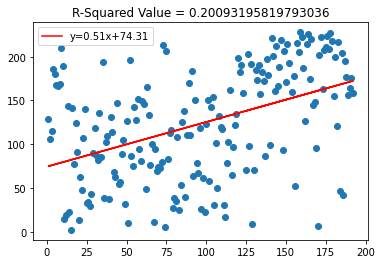

In [ ]:
import pandas as pd

def visual1():
	webpage = "https://www.cia.gov/library/publications/the-world-factbook/rankorder/2228rank.html"
	url = requests.get(webpage)
	soupy = BeautifulSoup(url.content,features="lxml")
	table = soupy.find('table',id ="rankOrder")
	rows = table.findAll('tr')
	header = table.find_all('th')
	cleaned = [[i.text for i in header]]
	for tr in rows[1:]:
		td = tr.find_all('td')
		row = [i.text for i in td]
		cleaned.append(row)
	data = pd.DataFrame(cleaned[1:])
	cleaned[0][2] = "Percent Obese (%)"
	data.columns = cleaned[0]
	data = data.sort_values(by = ['Country'])
	data = data.iloc[:,0:2]
	data['Country'] = data['Country'].str.strip()
	data = data.set_index("Country")

	webpage2 = "https://www.cia.gov/library/publications/the-world-factbook/fields/211rank.html"
	url2 = requests.get(webpage2)
	soupy2 = BeautifulSoup(url2.content,features="lxml")
	table2 = soupy2.find('table',id ="rankOrder")
	rows2 = table2.find_all('tr')
	header2 = table2.find_all('th')
	cleaned2 = [[i.text for i in header2]]
	for tr in rows2[1:]:
		td = tr.find_all('td')
		row = [i.text for i in td]
		cleaned2.append(row)
	data2 = pd.DataFrame(cleaned2[1:])
	cleaned2[0][2] = "GDP - PER CAPITA (PPP)"
	data2.columns = cleaned2[0]
	data2 = data2.sort_values(by = ['Country'])
	data2 = data2.iloc[:,0:2]
	data2['Country'] = data2['Country'].str.strip()
	merger = data.merge(data2, left_on='Country', right_on='Country', how = "outer").dropna()
	merger["Rank_x"] = merger['Rank_x'].astype(int)
	merger["Rank_y"] = merger['Rank_y'].astype(int)

	obesity_column = merger.loc[:,"Rank_x"]
	obesity = obesity_column.values
	GDP_column = merger.loc[:,"Rank_y"]
	GDP = GDP_column.values
	plotter = plt.plot(obesity,GDP,'o')
	m, b = np.polyfit(obesity, GDP, 1)
	plt.plot(obesity, m*obesity +b)
	line = m*obesity+b
	plt.plot(obesity, line, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
	correlation = np.corrcoef(obesity, GDP)
	correlation1 = correlation[0,1]
	r_squared = correlation1**2
	plt.title(label = "R-Squared Value = " + str(r_squared))
	plt.legend()
	plt.savefig("Scatter.jpeg")
############ Function Call ############
visual1()

### Visualization 1 Explanation

Question: What is the exact correlation between a country's GDP Per Capita and Obesity Rates?<br><br>
This visual takes a different approach from Insight1 to attempt to determine correlation between a country's wealth and obesity. The process here is similar to the insight1, but instead we find the line of best fit for the graph as well as the R^2 value to determine the correlation. From the line of best fit, we can see that there is some positive correlation between GDP and wealth. This is important as it shows a differing conclusion from Insight2 and Visual3 in terms of likelihood for obesity in America based on wealth. It is also important to note that the R^2 value was .2 which highlights a relatively low level of correlation.


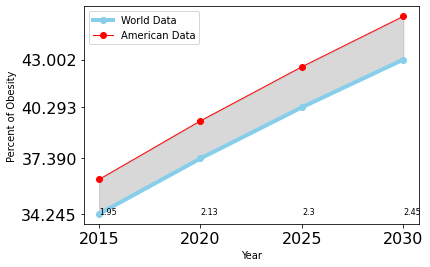

In [ ]:
def visual2():
  webpage = "https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.select("#tbl3 > table")[0]
  rows = table.find_all('tr')
  cleaned = []
  for tr in rows[3:8]:
    td = tr.find_all('td')
    row = [i.text.replace("\u2005", "").replace("\u2003","") for i in td]
    cleaned.append(row)
  del cleaned[1]
  data=pd.DataFrame(cleaned)
  data.columns = ["Model", "2010", "2015", "2020", "2025", "2030"]
  data.set_index("Model")
  rip = data
  rip["2015"] = rip["2015"].str.slice(0,5)
  rip["2015"] = rip["2015"].astype(float)
  world2015 = rip["2015"].sum() / 4

  American_scalar = 36.2 / world2015
  rip["2030"] = rip["2030"].str.slice(0,5)
  rip["2030"] = rip["2030"].astype(float)
  future2030 = rip["2030"].sum() / 4

  rip["2020"] = rip["2020"].str.slice(0,5)
  rip["2020"] = rip["2020"].astype(float)
  future2020 = rip["2020"].sum() / 4

  rip["2025"] = rip["2025"].str.slice(0,5)
  rip["2025"] = rip["2025"].astype(float)
  future2025 = rip["2025"].sum() / 4
  y1 = np.array([world2015,future2020,future2025,future2030])
  y2 = y1 * American_scalar
  x = np.array([2015,2020,2025,2030])
  for i in range(len(y1)):
    plt.text(x[i], min(y1), (y2[i]-y1[i]).round(2), size=8)
  plt.plot( x, y1, marker='o', color='skyblue', linewidth=4, label = "World Data")
  plt.plot( x, y2, marker='o', color='red', linewidth=1, label= "American Data")
  plt.fill_between(x, y1, y2, color="grey", alpha=0.3)
  plt.yticks(y1, size=16)
  plt.xticks(x, size=16)
  plt.legend()
  plt.xlabel("Year")
  plt.ylabel("Percent of Obesity")
  plt.savefig("Future_Line.jpeg")





############ Function Call ############
visual2()

### Visualization 2 Explanation

Question: What will America's Obesity Levels look like in 5 and 10 years and how does it differ from the World? <br><br>

Using the data from 2 of our cleaned data sets, we created a line graph representing the trends in the world for Obesity. After this, we used America's 2015 results, and interpolated how it the obesity rates would rise over the same span. From this, we determined that America would continue to widen its gap from the world average each year, but not by an extremely large margin over the next 10 years. (.5% increase in difference over 10 years)

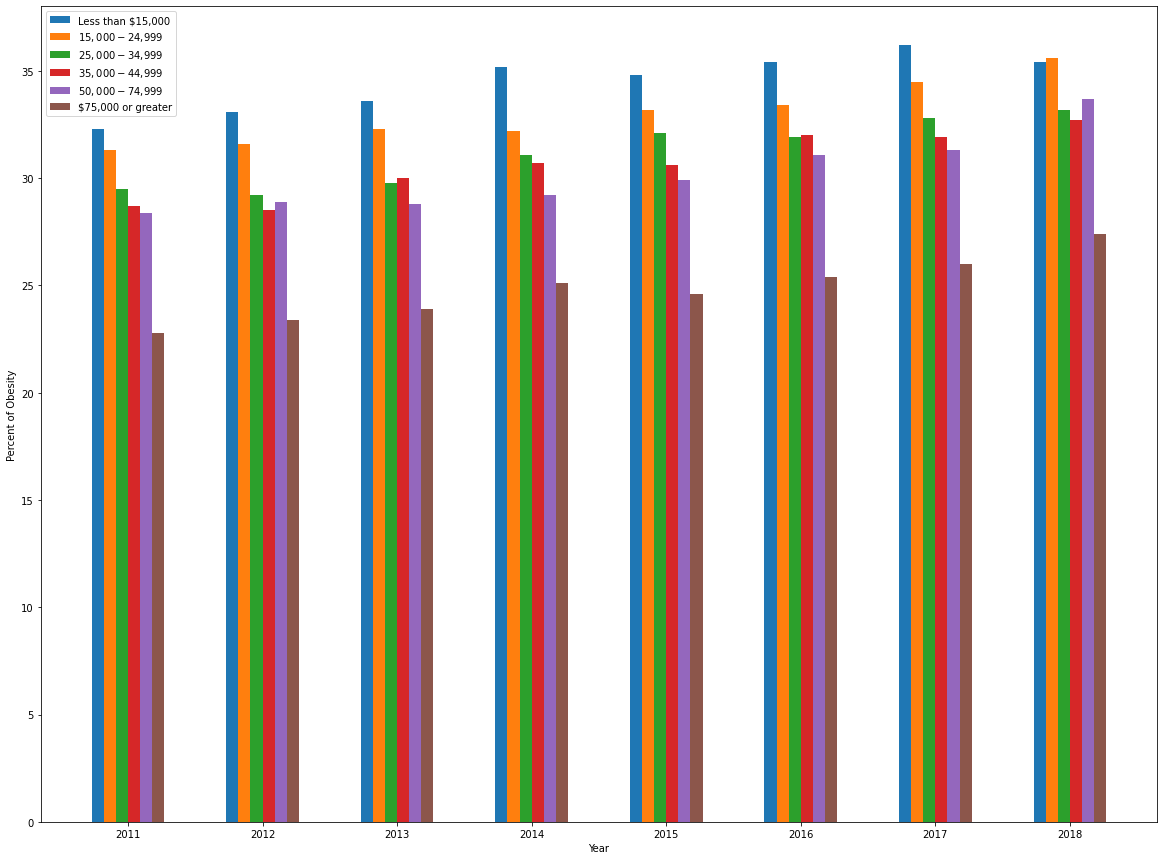

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import numpy as np
import csv
def visual3():
  income = pd.read_csv("Percent of adults aged 18 years and older who have obesity.csv")
  incoming = income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2011) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False)
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2012) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2013) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2014) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2015) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2016) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2017) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming = incoming.append(income.loc[(income['LocationDesc'] == 'National') &(income["Year"] == 2018) & (income['StratificationCategoryId1'] == 'INC')].sort_values(by = "Data_Value", ascending = False))
  incoming.drop(['Low_Confidence_Limit','High_Confidence_Limit ',"Sample_Size", "LocationID", "StratificationCategoryId1","StratificationID1"], axis = 1, inplace = True)

  figure, axis = plt.subplots(figsize=(20, 15))
  x = np.arange(len(incoming.Year.unique())) + 2011
  bar_width = 0.09
  blow = axis.bar(x, incoming.loc[incoming['Stratification1'] == 'Less than $15,000', 'Data_Value'], width=bar_width, label = 'Less than $15,000')
  b12 = axis.bar(x+ bar_width, incoming.loc[incoming['Stratification1'] == '$15,000 - $24,999', 'Data_Value'], width=bar_width, label = '$15,000 - $24,999')
  b23 = axis.bar(x + bar_width *2, incoming.loc[incoming['Stratification1'] == '$25,000 - $34,999', 'Data_Value'], width=bar_width, label = '$25,000 - $34,999')
  b34= axis.bar(x+ bar_width *3, incoming.loc[incoming['Stratification1'] == '$35,000 - $49,999', 'Data_Value'], width=bar_width, label = '$35,000 - $44,999')
  b57 = axis.bar(x+ bar_width *4, incoming.loc[incoming['Stratification1'] == '$50,000 - $74,999', 'Data_Value'], width=bar_width,label = '$50,000 - $74,999')
  bhigh = axis.bar(x+ bar_width *5, incoming.loc[incoming['Stratification1'] == '$75,000 or greater', 'Data_Value'], width=bar_width, label = "$75,000 or greater")
  axis.set_xticks(x + bar_width*2.5)
  axis.set_xticklabels(incoming.Year.unique())
  plt.xlabel("Year")
  plt.ylabel("Percent of Obesity")
  plt.legend()
  plt.savefig("Income_Bar.jpeg")





############ Function Call ############
visual3()

### Visualization 3 Explanation
Question: What is the trend in America for income vs. obesity levels over the past decade?<br><br>

Using a method similar to that of Insight2, we took the values for Income groups and expanded it over a course of the previous decade. With this, a few major conclusions can be drawn. First, the is a clear relation between wealth and Obesity levels in that lower income American's are more susceptible to obesity. The second conclusion that can be drawn is that the gap is lowering as time progresses between these income groupings. This is interesting as insight2 shows some strata have widening gaps of disparity.

## Summary Files

In [ ]:
import pandas as pd
import csv
def summary1():
    with open("Percent of adults aged 18 years and older who have obesity.csv", "r") as data:
        reader = csv.reader(data)
        datalist = [line for line in reader]
    df = pd.DataFrame(data = datalist[1:], columns = datalist[0])
    df = df[df["Stratification1"] == "Total"]
    df = df.drop(["LocationAbbr", "Question", "Low_Confidence_Limit", "High_Confidence_Limit ", "LocationID", "StratificationCategoryId1", "StratificationID1"], axis = 1)
    dtypeconv = {"Data_Value": float, "Sample_Size":int}
    df = df.astype(dtypeconv)
    df["obese_responses"] = ((df["Data_Value"]/100) * df["Sample_Size"]).round(0)
    df = df.groupby("LocationDesc").agg({"Sample_Size":"sum", "obese_responses":"sum"})
    df["Obesity_Rate"] = (df["obese_responses"]/df["Sample_Size"]).round(2)
    df = df.sort_values("Obesity_Rate")
    df.to_csv("location_summary.csv", index = True)





############ Function Call ############
summary1()

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import csv
from sklearn.linear_model import LinearRegression
def summary2():
  totaller = pd.read_csv("Percent of adults aged 18 years and older who have obesity.csv")
  totaller = totaller.loc[(totaller['LocationDesc'] == 'National') & (totaller['StratificationCategoryId1'] == 'OVR')].sort_values(by = "Year", ascending = True)
  totaller.drop(['Low_Confidence_Limit','High_Confidence_Limit ',"Sample_Size", "LocationID", "StratificationCategoryId1","StratificationID1"], axis = 1, inplace = True)
  regyear = np.array(totaller["Year"]).reshape((-1,1))
  regobs = np.array(totaller["Data_Value"])
  model = LinearRegression().fit(regyear,regobs)
  R_Squared = model.score(regyear,regobs)
  slope = model.coef_[0].round(4)

  for i in range(12):
    totaller = totaller.append({'Year' : 2019 + i, "LocationAbbr": "US", 'LocationDesc' : 'National', 'Question' : 'Percent of adults aged 18 years and older who have obesity', 'Data_Value' : (totaller.iloc[-1]['Data_Value'] + slope).round(1), 'Stratification1' : "Total"}, ignore_index = True)
	
  webpage = "https://www.ajpmonline.org/article/S0749-3797(12)00146-8/fulltext"
  url = requests.get(webpage)
  soupy = BeautifulSoup(url.content,features="lxml")
  table = soupy.select("#tbl3 > table")[0]
  rows = table.find_all('tr')
  cleaned = []
  for tr in rows[3:8]:
    td = tr.find_all('td')
    row = [i.text.replace("\u2005", "").replace("\u2003","") for i in td]
    cleaned.append(row)
  del cleaned[1]
  data=pd.DataFrame(cleaned)
  data.columns = ["Model", "2010", "2015", "2020", "2025", "2030"]
  data.set_index("Model")
  data["2015"] = data["2015"].str.slice(0,5)
  data["2015"] = data["2015"].astype(float)
  AmericaNow = 36.2/(data["2015"].sum() / 4)

  data["2030"] = data["2030"].str.slice(0,5)
  data["2030"] = data["2030"].astype(float)
  America2030 = data["2030"].sum() / 4
  totaller = totaller.append({'Year' : "2030 Projected From World Data", "LocationAbbr": "US", 'LocationDesc' : 'National', 'Question' : 'Percent of adults aged 18 years and older who have obesity', 'Data_Value' : America2030, 'Stratification1' : "Total"}, ignore_index = True)
  print("Difference in Two Projections: " + str((America2030 - totaller.iloc[-2]['Data_Value']).round(2)))
  totaller.to_csv("future_regression.csv", index = True)




############ Function Call ############
summary2()

Difference in Two Projections: 6.1


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link
https://youtu.be/jLcAyW4WIl8


Make sure the video sharing permissions are accessible for anyone with the provided link.